# Data Processing

In [ ]:
!pip install PyMuPDF
!pip install vaderSentiment
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/ColabNotebooks/Capstone/MTG.zip

Mounted at /content/drive
Archive:  /content/drive/MyDrive/ColabNotebooks/Capstone/MTG.zip
   creating: MTG/
  inflating: MTG/.DS_Store           
   creating: MTG/Files/
  inflating: MTG/Files/.DS_Store     
   creating: MTG/Files/3c-patch-for-treating-diabetic-foot-ulcers-pdf-64372180069573.pdf/
  inflating: MTG/Files/3c-patch-for-treating-diabetic-foot-ulcers-pdf-64372180069573.pdf/3c-patch-for-treating-diabetic-foot-ulcers-pdf-64372180069573.pdf  
  inflating: MTG/Files/3c-patch-for-treating-diabetic-foot-ulcers-pdf-64372180069573.pdf/supporting-documentation-2.pdf  
   creating: MTG/Files/alphastim-aid-for-anxiety-disorders-pdf-64372119603397.pdf/
  inflating: MTG/Files/alphastim-aid-for-anxiety-disorders-pdf-64372119603397.pdf/alphastim-aid-for-anxiety-disorders-pdf-64372119603397.pdf  
  inflating: MTG/Files/alphastim-aid-for-anxiety-disorders-pdf-64372119603397.pdf/supporting-documentation-2.pdf  
   creating: MTG/Files/ambu-ascope4-broncho-for-use-in-unexpected-difficult-airwa

In [ ]:
# use file_name extract content of 1 Recommendation
def read_recommendation(file_name):
    import fitz
    # open document
    pdf_document = fitz.open(file_name)

    text = ''
    # extraction markers
    start_extraction = False
    end_extraction = False
    start_marker = "1 \nRecommendations"
    end_marker = "2 \nThe technology"
    page_marker = "© NICE 2023"

    # Loop through the pages and extract text between "1 Recommendation" and "2 The technology"
    for page_num in range(len(pdf_document)):
        page = pdf_document[page_num]
        page_text = page.get_text()
        title_text = page_text[:page_text.find(")",0) + 1]
        # Check for the start marker
        if start_marker in page_text and '1.1' in page_text:
            start_extraction = True
            # Remove text before the start marker
            page_text = page_text.split(start_marker, 1)[-1]
        # Check for the end marker
        if end_marker in page_text:
            # Remove text after the end marker
            page_text = page_text.split(end_marker, 1)[0]
            # Stop extraction
            start_extraction = False
        # remove the page footer"
        else:
            page_text = page_text.split(page_marker, 1)[0]
        #if title_text in page_text:
            #page_text = page_text.replace(title_text,'')
        # If extraction flag is True, append the page text to the result
        if start_extraction:
            text += page_text
    return text

In [ ]:
def read_recommendation_clean(file_name):
    # open document
    import fitz
    import re
    pdf_document = fitz.open(file_name)
    text = ''
    # extraction markers
    start_extraction = False
    end_extraction = False
    start_marker = "1 \nRecommendations"
    end_marker1 = "Why the committee made these recommendations"
    end_marker2 = "2 \nThe technology"
    page_marker = "© NICE 2023"

    # Loop through the pages and extract text between "1 Recommendation" and "2 The technology"
    for page_num in range(len(pdf_document)):
        page = pdf_document[page_num]
        page_text = page.get_text()
        title_text = page_text[:page_text.find(")",0) + 1]
        # Check for the start marker
        if start_marker in page_text and '1.1' in page_text:
            start_extraction = True
            # Remove text before the start marker
            page_text = page_text.split('1.1', 1)[-1]
        if start_extraction == False:
            continue
        # Check for the end marker
        if end_marker1 in page_text:
            # Remove text after the end marker
            page_text = page_text.split(end_marker1, 1)[0]
            # Stop extraction
            start_extraction = False
        elif end_marker2 in page_text:
            # Remove text after the end marker
            page_text = page_text.split(end_marker2, 1)[0]
            # Stop extraction
            start_extraction = False
        # remove the page footer"
        else:
            page_text = page_text.split(page_marker, 1)[0]
        #if title_text in page_text:
            #page_text = page_text.replace(title_text,'')

        page_text = re.sub(r'[^a-zA-Z -]', '', page_text)
        text += page_text
    return text

In [ ]:
def read_file(directory_path):
    import os
    import pandas as pd
    import re
    # Initialize an empty list to store folder names
    folder_names = []

    if os.path.exists(directory_path) and os.path.isdir(directory_path):

      # Loop through each item (folders and files) in the "Files" director
      for item in os.listdir(directory_path):
          item_path = os.path.join(directory_path, item)
          # Check if the item is a directory (folder)
          if os.path.isdir(item_path):
              folder_names.append(item)

      rec_dict = {"Title": [], "Recommendation": [], "Recommendation_clean": []}
      for f in folder_names:
          # file directory
          file_name = directory_path + "/" + f + "/" + f

          # get recommendation
          rec = read_recommendation(file_name)
          rec = re.sub(r'[^a-zA-Z .0-9]', '', rec)

          # get clean recommendation
          rec_clean = read_recommendation_clean(file_name)
          rec_clean = re.sub(r'[^a-zA-Z .0-9]', '', rec_clean)

          # get all titles
          # title = f[:f.find("-pdf",0) + 1]
          # .replace("-"," ")

          rec_dict["Title"].append(f)
          rec_dict["Recommendation"].append(rec)
          rec_dict["Recommendation_clean"].append(rec_clean)


      rec_df = pd.DataFrame(rec_dict)

      return rec_df

data = read_file("/content/MTG/Files")

# Sentiment Analysis

In [ ]:
# import nltk
# nltk.download('stopwords')

# def rem_sw(df_in):
#     # from nltk.corpus import stopwords
#     # sw = stopwords.words('english') + ['NICE']
#     sw = ['NICE', 'low', 'cancer', 'suspected', 'negative', 'pressure', 'risk', 'pain']
#     tmp = [word for word in df_in.split() if word not in sw]
#     tmp = ' '.join(tmp)
#     return tmp

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# def keywords_matching(text):
#     negative_word_list = ["not recommended", "not supported by the evidence", 'more evidence is needed',\
#                "not enough"]
#     positive_word_list = ["as an option", "evidence supports", \
#                          "is recommended", "is supported "]

#     words = negative_word_list + positive_word_list
#     prescore = 0

#     # Iterate through each word in the text
#     for word in words:
#       if word in text:
#         if word in negative_word_list:
#           prescore = -1
#         elif word in positive_word_list:
#           prescore = 1

#     return prescore

In [ ]:
# def vader_senti(str_in):
#     from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#     senti = SentimentIntensityAnalyzer()
#     out_put = senti.polarity_scores(str_in)["compound"]
#     #out_put["sentiment"] = out_put.compound.apply(categorize_senti)
#     return out_put

In [ ]:
# def vader_senti_bigram(text):
#     from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#     import numpy as np

#     # Initialize the VADER sentiment analyzer
#     senti = SentimentIntensityAnalyzer()

#     # Tokenize the text into bigrams
#     words = text.split()
#     bigrams = [f"{words[i]} {words[i+1]}" for i in range(len(words) - 1)]

#     # Initialize a list to store sentiment scores for each bigram
#     bigram_sentiments = []

#     # Calculate sentiment scores for each bigram
#     for bigram in bigrams:
#         score = senti.polarity_scores(bigram)["compound"]
#         if score == 0:
#           fir, sec = bigram.split()
#           bigram_sentiments.append( senti.polarity_scores(fir)["compound"] + senti.polarity_scores(sec)["compound"] )
#         else:
#           bigram_sentiments.append( score )

#     # Calculate the total sentiment score for all bigrams
#     if bigram_sentiments:
#         average_score = sum(bigram_sentiments)
#     else:
#         average_score = 0.0  # Handle the case when there are no bigrams

#     return average_score


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np
# import time
# start_time = time.time()


# # Trial #1: sentiment score
# data['sentiment_score'] = data['Recommendation'].apply(vader_senti)

# # Trial #2: sentiment score with confusing words removed
# # data['Recommendation_sw'] = data['Recommendation'].apply(rem_sw)
# # data['sentiment_score_sw'] = data['Recommendation_sw'].apply(vader_senti)

# # Trial #3: sentiment score with multigram
# # data['sentiment_score_multigram'] = data['Recommendation'].apply(vader_senti_bigram)
# # data['sentiment_score_multigram_norm'] = MinMaxScaler().fit_transform(np.array(data['sentiment_score_multigram']).reshape(-1,1))

# # Trial #4: sentiment score with confusing words removed and multigram
# # data['sentiment_score_sw_multigram'] = data['Recommendation_sw'].apply(vader_senti_bigram) # need to be normalize to range [-1, 1]
# # data['sentiment_score_sw_multigram_norm'] = MinMaxScaler().fit_transform(np.array(data['sentiment_score_sw_multigram']).reshape(-1,1))

# # Trial #5: sentiment score on conclusion (without why committe)
# data['sentiment_score_clean'] = data['Recommendation_clean'].apply(vader_senti)

# # Trial #5.1: sentiment score on conclusion (without why committe) and a layer of keywords
# # data['sentiment_score_clean_keywords'] = data['Recommendation_clean'].apply(keywords_matching) + data['sentiment_score_clean']

# # Trial #6: sentiment score on conclusion (without why committe) with confusing words removed
# # data['Recommendation_sw_clean'] = data['Recommendation_clean'].apply(rem_sw)
# # data['sentiment_score_sw_clean'] = data['Recommendation_clean'].apply(vader_senti)

# # Trial #6.1: sentiment score on conclusion (without why committe) with confusing words removed with a layer of keywords
# # data['sentiment_score_sw_clean_keywords'] = data['Recommendation_clean'].apply(keywords_matching) + data['sentiment_score_sw_clean']

# # Trial #7: sentiment score on conclusion (without why committe) with confusing words removed and multigram
# # data['sentiment_score_sw_clean_multigram'] = data['Recommendation_sw_clean'].apply(vader_senti_bigram)
# # data['sentiment_score_sw_clean_multigram_norm'] = MinMaxScaler().fit_transform(np.array(data['sentiment_score_sw_clean_multigram']).reshape(-1,1))

# # Trial #8: sentiment score with multigram with a layer of keyword matching
# # data['sentiment_score_multigram_keywords_norm'] = data['Recommendation'].apply(keywords_matching) + data['sentiment_score_multigram_norm']

# # Trial #9: sentiment score with confusing words removed and multigram with a layer of keyword matching
# # data['sentiment_score_sw_multigram_keywords'] = data['Recommendation_sw'].apply(vader_senti_bigram_keywords)
# # data['sentiment_score_sw_multigram_keywords_norm'] = MinMaxScaler().fit_transform(np.array(data['sentiment_score_sw_multigram_keywords']).reshape(-1,1))
# # data['sentiment_score_sw_multigram_keywords_norm'] = data['Recommendation_sw'].apply(keywords_matching) + data['sentiment_score_sw_multigram_norm']

# # Trial #10: sentiment score on conclusion (without why committe) with confusing words removed and multigram with a layer of keyword matching
# # data['sentiment_score_sw_clean_multigram_keywords'] = data['Recommendation_sw_clean'].apply(vader_senti_bigram_keywords)
# # data['sentiment_score_sw_clean_multigram_keywords_norm'] = MinMaxScaler().fit_transform(np.array(data['sentiment_score_sw_clean_multigram_keywords']).reshape(-1,1))
# # data['sentiment_score_sw_clean_multigram_keywords_norm'] = data['Recommendation_sw_clean'].apply(keywords_matching) + data['sentiment_score_sw_clean_multigram_norm']


# # apply normalization techniques
# # data['sentiment_score_sw_multigram_norm'] = MinMaxScaler().fit_transform(data['sentiment_score_multigram'])

# end_time = time.time()
# # Print the elapsed time in seconds
# print(f"Elapsed Time (seconds): {end_time - start_time}")

# data.sort_values(by='Title').head()

Elapsed Time (seconds): 6.715130090713501


,Title,Recommendation,Recommendation_clean,sentiment_score,sentiment_score_clean
59,3c-patch-for-treating-diabetic-foot-ulcers-pdf...,1.1 3C Patch is not recommended as a costsavi...,C Patch is not recommended as a costsaving op...,-0.5696,-0.1511
44,alphastim-aid-for-anxiety-disorders-pdf-643721...,1.1 AlphaStim AID shows promise for managing ...,AlphaStim AID shows promise for managing anxi...,0.1371,0.8020
41,ambu-ascope4-broncho-for-use-in-unexpected-dif...,NICE medical technologies guidance addresses ...,The case for adopting the Ambu aScope Broncho...,0.9829,0.9300
5,ambulight-pdt-for-the-treatment-of-nonmelanoma...,NICE medical technologies guidance addresses ...,Ambulight PDT offers a means of delivering ph...,0.9215,-0.3971
46,aposhealth-for-knee-osteoarthritis-pdf-6437224...,1.1 AposHealth is recommended as a costsaving...,AposHealth is recommended as a costsaving opt...,-0.7858,0.4515


# NLP Modeling

## Simple CNN

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
# df = pd.read_pickle("/content/drive/MyDrive/ColabNotebooks/Capstone/data.pkl")

## 预测是否是device
## 预测是否recommend

# df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Capstone/data_to_lauren(2).csv')
# df = df[['ipg_index', 'combined_text', 'is_device', 'recommendation']]
# df = pd.read_csv('/content/data_to_lauren(2).csv')

df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Capstone/result_df.csv')
df = df[['ipg_index', 'combined_text', 'is_device', 'recommendation']]
df.columns = ['ipg_index', 'text', 'is_device', 'recommendation']
df.head()

Mounted at /content/drive


,ipg_index,text,is_device,recommendation
0,IPG101,"['gastrointestinal', 'bleeding', 'suspected', ...",1,standard arrangements
1,IPG105,"['intracranial', 'aneurysm', 'intracranial', '...",0,standard arrangements
2,IPG106,"['intracranial', 'aneurysm', 'intracranial', '...",0,standard arrangements
3,IPG108,"['deafness', 'caused', 'damage', 'vestibulococ...",1,standard arrangements
4,IPG110,"['osteoarthritis', 'metacarpophalangeal', 'mcp...",0,standard arrangements


In [2]:
import ast
df['text'] = df['text'].apply(ast.literal_eval)

In [3]:
device_pred_df = df[['ipg_index', 'text', 'is_device']]

In [4]:
device_pred_df['sentences'] = device_pred_df['text'].apply(' '.join)
device_pred_df.head()

,ipg_index,text,is_device,sentences
0,IPG101,"[gastrointestinal, bleeding, suspected, crohn,...",1,gastrointestinal bleeding suspected crohn ’ di...
1,IPG105,"[intracranial, aneurysm, intracranial, aneurys...",0,intracranial aneurysm intracranial aneurysms d...
2,IPG106,"[intracranial, aneurysm, intracranial, aneurys...",0,intracranial aneurysm intracranial aneurysms d...
3,IPG108,"[deafness, caused, damage, vestibulocochlear, ...",1,deafness caused damage vestibulocochlear nerve...
4,IPG110,"[osteoarthritis, metacarpophalangeal, mcp, int...",0,osteoarthritis metacarpophalangeal mcp interph...


In [5]:
## Data Sampling

is_device = device_pred_df[device_pred_df['is_device'] == 1]
is_not_device = device_pred_df[device_pred_df['is_device'] == 0]

# Sample 50 rows from special arrangements
sampled_is_device = is_device.sample(n=121, random_state=42)

# Concatenate the sampled special arrangements with the other arrangements
new_device_pred_df = pd.concat([sampled_is_device, is_not_device])

# Reset the index if needed
new_device_pred_df = new_device_pred_df.reset_index(drop=True)
new_device_pred_df['index'] = new_device_pred_df.index
new_device_pred_df.head()

,ipg_index,text,is_device,sentences,index
0,IPG723,"[lymphoedema, abnormal, accumulation, subcutan...",1,lymphoedema abnormal accumulation subcutaneous...,0
1,IPG378,"[coronary, artery, disease, cad, refers, narro...",1,coronary artery disease cad refers narrowing o...,1
2,IPG620,"[chronic, low, back, pain, may, result, degene...",1,chronic low back pain may result degenerative ...,2
3,IPG648,"[anal, fistula, abnormal, tract, anal, canal, ...",1,anal fistula abnormal tract anal canal skin ar...,3
4,IPG728,"[scoliosis, dimensional, spinal, deformity, ca...",1,scoliosis dimensional spinal deformity causes ...,4


In [3]:
print(df.isna().sum())
df = df.dropna()

ipg_index          0
text               0
is_device          0
recommendation    28
dtype: int64


In [4]:
import numpy as np
df.loc[df['recommendation'].str.contains(',|/'), 'recommendation'] = np.nan
df = df.dropna()

In [5]:
import pandas as pd
import numpy as np

# 假设你的 DataFrame 叫 df，列名为 'recommendation'
df['recommendation'] = df['recommendation'].str.strip().str.lower()

df.recommendation = df.recommendation.apply(lambda x: 'special arrangements' if x.startswith('special') else x)
df.recommendation = df.recommendation.apply(lambda x: 'standard arrangements' if x.startswith('standard') or x.startswith('normal') else x)
df.recommendation = df.recommendation.apply(lambda x: 'only in research' if x.startswith('only') or x.startswith('on') else x)
df.recommendation = df.recommendation.apply(lambda x: 'do not use' if x.startswith('do') else x)

df.recommendation.value_counts()

<ipython-input-5-fb9f6a17bf33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recommendation'] = df['recommendation'].str.strip().str.lower()
<ipython-input-5-fb9f6a17bf33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.recommendation = df.recommendation.apply(lambda x: 'special arrangements' if x.startswith('special') else x)
<ipython-input-5-fb9f6a17bf33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

special arrangements     114
standard arrangements    104
only in research          67
do not use                 9
Name: recommendation, dtype: int64

In [6]:
df['sentences'] = df['text'].apply(' '.join)
df.columns

<ipython-input-6-e830f5d24805>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences'] = df['text'].apply(' '.join)


Index(['ipg_index', 'text', 'is_device', 'recommendation', 'sentences'], dtype='object')

In [7]:
df = df[df.is_device == 1].reset_index()
df.recommendation.value_counts()

special arrangements     80
standard arrangements    59
only in research         53
do not use                6
Name: recommendation, dtype: int64

In [8]:
# from sklearn.utils import resample

# minority_class = df[df['recommendation'] == 'do not use']

# Oversample the minority classes
# oversampled_minority_classes = resample(minority_class, replace=True, n_samples=50, random_state=42)

# Combine oversampled minority classes with majority class
# oversampled_df = pd.concat([df[df['recommendation'] != 'do not use'], oversampled_minority_classes])

# oversampled_df.recommendation.value_counts()
df.head()

,index,ipg_index,text,is_device,recommendation,sentences
0,0,IPG101,"[gastrointestinal, bleeding, suspected, crohn,...",1,standard arrangements,gastrointestinal bleeding suspected crohn ’ di...
1,3,IPG108,"[deafness, caused, damage, vestibulocochlear, ...",1,standard arrangements,deafness caused damage vestibulocochlear nerve...
2,8,IPG118,"[prostate, cancer, although, highintensity, fo...",1,standard arrangements,prostate cancer although highintensity focused...
3,13,IPG128,"[patients, coronary, artery, disease, cad, eit...",1,special arrangements,patients coronary artery disease cad either si...
4,14,IPG129,"[ct, colonography, used, examine, colon, rectu...",1,standard arrangements,ct colonography used examine colon rectum dete...


In [9]:
input_col = 'sentences'
output_col = 'recommendation'
# output2_col = 'is_device'
# output_col = 'is_device'
document_col = 'ipg_index'

In [7]:
df = new_device_pred_df

In [10]:
df.drop(columns=['index'])
print(df.index)

RangeIndex(start=0, stop=198, step=1)


In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout, BatchNormalization, MaxPooling1D
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import pandas as pd

# Add a column with indices to your DataFrame
df['index'] = df.index

# Split the data into features (sentences) and labels
sentences = df[input_col].values
labels = df[output_col].values
num_classes = df[output_col].nunique()

# Tokenize the sentences
tokenizer = Tokenizer(num_words=2000) # if we want to restrict to certain size
tokenizer.fit_on_texts(sentences)

# Convert labels from strings to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
# label_encoder.inverse_transform(labels)

# Convert the sentences to sequences
sequences = tokenizer.texts_to_sequences(sentences)

# Pad the sequences so they're all the same length
maxlen = max(len(sequence) for sequence in sequences)
X = pad_sequences(sequences, maxlen=maxlen)

# Convert the labels to a numpy array
y = np.array(labels)
# Convert labels to one-hot encoding for multi-class classification
y = to_categorical(y)


# Split the data into a training set and a test set while keeping track of indices
X_train_indices, X_test_indices, y_train_indices, y_test_indices = train_test_split(df['index'], df['index'], test_size=0.2, random_state=42, stratify=y)
X_train_indices, X_val_indices, y_train_indices, y_val_indices = train_test_split(X_train_indices, X_train_indices, test_size=0.2, random_state=42, stratify=df.loc[X_train_indices, output_col])

# Use the indices to extract the corresponding data
X_train, X_val, X_test = X[X_train_indices], X[X_val_indices], X[X_test_indices]
y_train, y_val, y_test = y[X_train_indices], y[X_val_indices], y[X_test_indices]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42, stratify=y_train)

In [13]:
label_encoder.classes_

array(['do not use', 'only in research', 'special arrangements',
       'standard arrangements'], dtype=object)

In [12]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=500, input_length=maxlen))
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization for stabilization
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

# Train the model
model.fit(X_train, y_train, epochs=15, verbose=1, validation_data=(X_val, y_val), batch_size=10)

# Evaluate the model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=1)

# Print the evaluation results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Precision: {precision*100:.2f}%")
print(f"Test Recall: {recall*100:.2f}%")

Epoch 1/15
13/13 [==============================] - 6s 247ms/step - loss: 1.5016 - accuracy: 0.2619 - precision: 0.3333 - recall: 0.0714 - val_loss: 1.3797 - val_accuracy: 0.2500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
13/13 [==============================] - 4s 325ms/step - loss: 1.1608 - accuracy: 0.5000 - precision: 0.6829 - recall: 0.2222 - val_loss: 1.3524 - val_accuracy: 0.3125 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
13/13 [==============================] - 7s 537ms/step - loss: 0.9100 - accuracy: 0.7143 - precision: 0.8833 - recall: 0.4206 - val_loss: 1.3279 - val_accuracy: 0.4062 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
13/13 [==============================] - 5s 399ms/step - loss: 0.7417 - accuracy: 0.8016 - precision: 0.8765 - recall: 0.5635 - val_loss: 1.3091 - val_accuracy: 0.4062 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
13/13 [==============================] - 4s 264ms/step - loss

In [15]:
# Get the logits (outputs of the second last layer) for X_test
logits = model.predict(X_test)

# Create a DataFrame to store the results
df_test = df.loc[X_test_indices]

df_results = pd.DataFrame({
    'Title': df_test[document_col],
    **{f'Probability_{i}': logits[:, i] for i in range(num_classes)},
    'Predicted_Label': label_encoder.inverse_transform(logits.argmax(axis=1)),
    'True_Label': df_test[output_col]
})

df_results.columns = ['Title','Prob_Not_Use', 'Prob_Research', 'Prob_Spcial', 'Prob_Standard', 'Predicted_Label', 'True_Label']

def highlight_mismatch(series):
    return ['background-color: yellow' if series['True_Label'] != series['Predicted_Label'] else '' for _ in series.index]

styled_results_df = df_results.style.apply(
    lambda series: highlight_mismatch(series),
    axis=1  # Apply the function along rows
)

styled_results_df

2/2 [==============================] - 1s 223ms/step


,Title,Prob_Not_Use,Prob_Research,Prob_Spcial,Prob_Standard,Predicted_Label,True_Label
197,IPG98,0.130958,0.183010,0.385099,0.300932,special arrangements,standard arrangements
181,IPG757,0.127849,0.181769,0.465500,0.224882,special arrangements,standard arrangements
123,IPG688,0.137084,0.173499,0.370466,0.318951,special arrangements,special arrangements
75,IPG630,0.139648,0.245125,0.326099,0.289128,special arrangements,only in research
97,IPG656,0.132134,0.209343,0.405028,0.253495,special arrangements,special arrangements
56,IPG603,0.121750,0.190866,0.449852,0.237532,special arrangements,standard arrangements
135,IPG704,0.134540,0.200052,0.346187,0.319221,special arrangements,special arrangements
13,IPG376,0.124714,0.190847,0.424620,0.259819,special arrangements,special arrangements
58,IPG606,0.153180,0.222512,0.327874,0.296434,special arrangements,only in research
118,IPG680,0.136132,0.174698,0.394057,0.295112,special arrangements,only in research


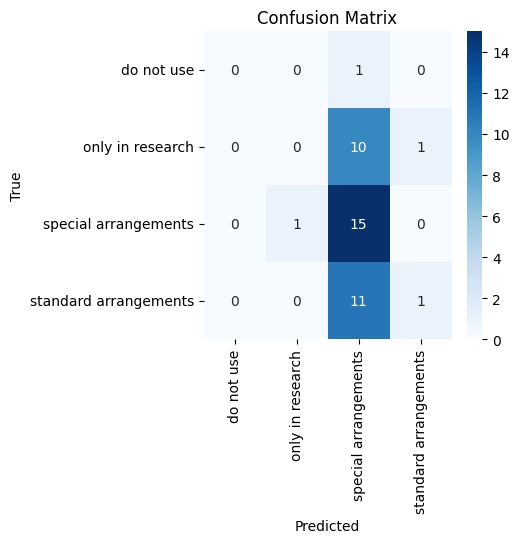

In [16]:
# Convert predicted probabilities to predicted labels
y_pred = np.argmax(logits, axis=1)
y_true = np.argmax(y_test, axis=1)

# Display confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(num_classes, num_classes))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 791, 500)          1000000   
                                                                 
 conv1d_2 (Conv1D)           (None, 787, 64)           160064    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 393, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 389, 64)           20544     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_3 (Dense)             (None, 64)               

## BERT Embedding

In [ ]:
input_col = 'sentences'
output_col = 'recommendation'
output2_col = 'is_device'
document_col = 'ipg_index'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import Dataset, DataLoader

# Assuming df is your DataFrame and it has columns 'sentence' and 'recommendation'
sentences = df[input_col].values
labels = df[output_col].values

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
print(labels)

# Use BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Tokenize all sentences
input_ids = []
attention_masks = []

for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
        sent,
        add_special_tokens=True,
        max_length=64,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert lists into tensors
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)


# Split data into train, validation, and test
train_inputs, temp_inputs, train_labels, temp_labels = train_test_split(input_ids, labels, random_state=42, test_size=0.3)
validation_inputs, test_inputs, validation_labels, test_labels = train_test_split(temp_inputs, temp_labels, random_state=42, test_size=0.5)

train_masks, temp_masks, _, _ = train_test_split(attention_masks, labels, random_state=42, test_size=0.3)
validation_masks, test_masks, _, _ = train_test_split(temp_masks, temp_labels, random_state=42, test_size=0.5)

# Create a Dataset for our data
class SentenceDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attention_masks[idx], self.labels[idx]

# Create DataLoaders for our data
train_dataset = SentenceDataset(train_inputs, train_masks, train_labels)
validation_dataset = SentenceDataset(validation_inputs, validation_masks, validation_labels)
test_dataset = SentenceDataset(test_inputs, test_masks, test_labels)

train_dataloader = DataLoader(train_dataset, batch_size=32)
validation_dataloader = DataLoader(validation_dataset, batch_size=32)
test_dataloader = DataLoader(test_dataset, batch_size=32)

# Now you can use this dataloader to train your BERT model


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Advanced CNN

In [ ]:
# Save the model to a file
# torch.save(model.state_dict(), 'CNN1.pth')
# torch.load('CNN1.pth')

In [ ]:
# import argparse
# import logging
# import time

# import torch
# from torch.utils.data import DataLoader
# from torch.utils.data.dataset import random_split
# # from torchtext.data.functional import to_map_style_dataset
# from torchtext.data.utils import get_tokenizer, ngrams_iterator
# from torchtext.datasets import DATASETS
# from torchtext.utils import download_from_url
# from torchtext.vocab import build_vocab_from_iterator
# import torch.nn as nn
# from torch.nn.utils.rnn import pad_sequence
# import torch.nn.functional as F
# from torchtext.vocab import FastText, CharNGram
# from tqdm import tqdm

# DEVICE = "cpu"
# EMBED_DIM = 300
# LR = 4.0
# BATCH_SIZE = 16
# NUM_EPOCHS = 5
# PADDING_VALUE = 0
# PADDING_IDX = PADDING_VALUE


# num_class = df[output_col].nunique()

# data_iter = df[[input_col, output_col]].itertuples(index=False)

# # Use the basic_english tokenizer
# basic_english_tokenizer = get_tokenizer("basic_english")
# TOKENIZER = basic_english_tokenizer

# def yield_tokens(data_iter):
#     for text, _ in data_iter:
#         yield TOKENIZER(text)

# # Build vocabulary
# VOCAB = build_vocab_from_iterator(yield_tokens(data_iter), specials=('<pad>', '<unk>'))

# # Make the default index the same as that of the unk_token.
# VOCAB.set_default_index(VOCAB['<unk>'])

# # Example of using FastText and CharNGram (you can choose one or neither)
# FAST_TEXT = FastText("simple")


In [ ]:
# import torch
# from torch.nn.utils.rnn import pad_sequence

# def text_pipeline(text):
#     return VOCAB(TOKENIZER(text))

# # Modify the label_pipeline function to handle string labels
# def label_pipeline(label):
#     # FILL
#     label_mapping = {'Treatment Option': 0, 'Not Supporting Routine Use': 1, 'Routine Use': 2}
#     return label_mapping[label]

# def collate_batch(batch):
#     label_list, text_list = [], []
#     for (_text, _label) in batch:
#         # Get the label
#         label_list.append(label_pipeline(_label))

#         # Return a list of ints.
#         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
#         text_list.append(processed_text.clone().detach())

#     label_list = torch.tensor(label_list, dtype=torch.int64)
#     text_list = pad_sequence(text_list, batch_first=True)

#     return label_list.to(DEVICE), text_list.to(DEVICE)


In [ ]:
# class CNN1dTextClassificationModel(nn.Module):
#     def __init__(
#         self,
#         vocab_size,
#         num_class,
#         embed_dim = 300,
#         use_pretrained = True,
#         fine_tune_embeddings = True
#     ):

#         super(CNN1dTextClassificationModel, self).__init__()

#         self.embedding = nn.Embedding(
#             vocab_size,
#             embed_dim,
#             padding_idx=PADDING_IDX
#         )

#         if use_pretrained:
#             self.embedding.weight.requires_grad = False
#             for i in range(vocab_size):
#                 token = VOCAB.lookup_token(i)

#                 self.embedding.weight[i, :] = FAST_TEXT.get_vecs_by_tokens(
#                     token,
#                     lower_case_backup=True
#                 )
#             self.embedding.weight.requires_grad = True
#         else:
#             self.init_weights()

#         if not fine_tune_embeddings:
#             self.embedding.weight.requires_grad = False


#         self.cnn2 = nn.Conv1d(embed_dim, 1, 2)
#         self.cnn3 = nn.Conv1d(embed_dim, 1, 3)
#         self.cnn4 = nn.Conv1d(embed_dim, 1, 4)

#         self.fc = nn.Linear(3, num_class)

#         # For drop out + ReLu, order does not matter.
#         self.dropout = nn.Dropout(0.3)

#         # Set to True at first, then set to False.
#         self.debug = True

#     def init_weights(self):
#         initrange = 0.5
#         self.embedding.weight.data.uniform_(-initrange, initrange)
#         self.fc.weight.data.uniform_(-initrange, initrange)
#         self.fc.bias.data.zero_()

#     # N = batch_size, L = sequence length, D = embed_dim
#     def forward(self, text):

#         # N X L X embed_dim
#         embedded = self.embedding(text)

#         if self.debug:
#             print('embedding', embedded.shape)

#         # N X embed_dim X L
#         embedded = embedded.transpose(1, 2)

#         # N X 1 X L - 1
#         cnn2 = nn.ReLU()(self.cnn2(embedded))
#         if self.debug:
#             print('cnn2', cnn2.shape)

#         # N X 1 X L - 2
#         cnn3 = nn.ReLU()(self.cnn3(embedded))
#         if self.debug:
#             print('cnn3', cnn3.shape)

#         # B X 1 X L - 3
#         cnn4 = nn.ReLU()(self.cnn4(embedded))
#         if self.debug:
#             print('cnn4', cnn4.shape)

#         # N X 1 in all cases.
#         cnn2 = nn.MaxPool1d(cnn2.size(-1))(cnn2)
#         cnn3 = nn.MaxPool1d(cnn3.size(-1))(cnn3)
#         cnn4 = nn.MaxPool1d(cnn4.size(-1))(cnn4)
#         if self.debug:
#             print('cnn2 after max', cnn2.shape)

#         # N X 3
#         cnn_concat = self.dropout(
#             torch.cat((cnn2.squeeze(1), cnn3.squeeze(1), cnn4.squeeze(1)), -1)
#         )
#         if self.debug:
#             print('cnn concat', cnn_concat.shape)

#         out = self.fc(cnn_concat)

#         # Set this to False after going through one batch od data.
#         self.debug = False

#         return out

# # For CNN2d the data should be of shape B X 1 X D X L instead of B X D X L .
# # This is since the "channel" is 1 dimensional.
# class CNN2dTextClassificationModel(nn.Module):
#     def __init__(
#         self,
#         vocab_size,
#         num_class,
#         embed_dim = 300,
#         use_pretrained = True,
#         fine_tune_embeddings = True
#     ):

#         super(CNN2dTextClassificationModel, self).__init__()

#         self.embedding = nn.Embedding(
#             vocab_size,
#             embed_dim,
#             padding_idx=PADDING_IDX
#         )

#         if use_pretrained:
#             self.embedding.weight.requires_grad = False
#             for i in range(vocab_size):
#                 token = VOCAB.lookup_token(i)

#                 print(token, TOKENIZER(token))

#                 self.embedding.weight[i, :] = FAST_TEXT.get_vecs_by_tokens(
#                     TOKENIZER(token),
#                     lower_case_backup=True
#                 )
#             self.embedding.weight.requires_grad = True
#         else:
#             self.init_weights()

#         if not fine_tune_embeddings:
#             self.embedding.weight.requires_grad = False

#         # In C X H X W "image", we have C = 1, H = embed_dim, W = k for text.
#         # We can also swap H and W but this is to make this "look" like the case when we do 1d convolutions.
#         self.convs = [
#             nn.Conv2d(1, 1, (embed_dim, 2)),
#             nn.Conv2d(1, 1, (embed_dim, 3)),
#             nn.Conv2d(1, 1, (embed_dim, 4))
#         ]

#         self.fc = nn.Linear(3, num_class)

#         # For drop out + ReLu, order does not matter.
#         self.dropout = nn.Dropout(0.3)

#         self.debug = True

#     def init_weights(self):
#         initrange = 0.5
#         self.embedding.weight.data.uniform_(-initrange, initrange)
#         self.fc.weight.data.uniform_(-initrange, initrange)
#         self.fc.bias.data.zero_()

#     # B = batch_size, L = sequence length, D = vector dimension
#     def forward(self, text):
#         # text is originally B X L

#         # N X L X embed_dim
#         embedded = self.embedding(text)

#         if self.debug:
#             print('embedded ', embedded.shape)

#         # N X embed_dim X L
#         embedded = embedded.transpose(1, 2)

#         if self.debug:
#             print('embedded ', embedded.shape)

#         convs = [
#             # This is N X 1 X (L - k + 1), where k is the filter size.
#             # We need to add a dimension to "embedded".
#             nn.ReLU()(conv(embedded.unsqueeze(1))) for  conv in self.convs
#         ]

#         if self.debug:
#             print('conv ', [conv.shape for conv in convs])

#         # Across all time steps. This is a list ad each is dimension 3.
#         maxes = [
#             nn.MaxPool2d((1, conv.size(-1)))(conv).squeeze() for conv in convs
#         ]

#         if self.debug:
#             print('max ', [conv_max.shape for conv_max in maxes])

#         # N X 3
#         maxes_stack = self.dropout(
#             torch.vstack(maxes).t()
#         )

#         if self.debug:
#             print('max_stack ', maxes_stack.shape)


#         out = self.fc(maxes_stack)

#         # Set to False after the first batch goes through.
#         self.debug = False

#         return out

In [ ]:
# criterion = torch.nn.CrossEntropyLoss().to(DEVICE)
# model1 = CNN1dTextClassificationModel(
#     len(VOCAB),
#     num_class
# ).to(DEVICE)

# model2 = CNN2dTextClassificationModel(
#     len(VOCAB),
#     num_class
# ).to(DEVICE)

In [ ]:
# model = model1

In [ ]:
# optimizer = torch.optim.SGD(model.parameters(), lr=LR)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

In [ ]:
# from torch.utils.data import Dataset, random_split, DataLoader

# class DataFrameDataset(Dataset):
#     def __init__(self, df, text_field, label_field):
#         self.df = df
#         self.text_field = text_field
#         self.label_field = label_field

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, idx):
#         return self.df.loc[idx, self.text_field], self.df.loc[idx, self.label_field]

# dataset = DataFrameDataset(df, input_col, output_col)

# # Define the proportions
# train_ratio = 0.7
# valid_ratio = 0.15
# test_ratio = 0.15

# train_size = int(len(df) * train_ratio)
# valid_size = int(len(df) * valid_ratio)
# test_size = len(df) - train_size - valid_size

# train_data, valid_data, test_data = random_split(df, [train_size, valid_size, test_size])

# # Create your dataloaders
# train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
# valid_dataloader = DataLoader(valid_data, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch)
# test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch)



In [ ]:
# def train(dataloader, model, optimizer, criterion, epoch):
#     model.train()
#     total_acc, total_count = 0, 0
#     log_interval = 1000

#     for idx, (label, text) in tqdm(enumerate(dataloader), total=len(dataloader), mininterval=3):
#         optimizer.zero_grad()
#         predicted_label = model(text)

#         # Get the loss.
#         loss = criterion(input=predicted_label, target=label)

#         # Do back propagation.
#         loss.backward()

#         # Clip the gradients.
#         torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)

#         # Do an optimization step.
#         optimizer.step()
#         total_acc += (predicted_label.argmax(1) == label).sum().item()
#         total_count += label.size(0)
#         if idx % log_interval == 0 and idx > 0:
#             print(
#                 "| epoch {:3d} | {:5d}/{:5d} batches "
#                 "| accuracy {:8.3f}".format(epoch, idx, len(dataloader), total_acc / total_count)
#             )
#             total_acc, total_count = 0, 0

In [ ]:
# def evaluate(dataloader, model):
#     model.eval()
#     total_acc, total_count = 0, 0

#     with torch.no_grad():
#         for idx, (label, text) in enumerate(dataloader):
#             predited_label = model(text)
#             total_acc += (predited_label.argmax(1) == label).sum().item()
#             total_count += label.size(0)
#     return total_acc / total_count

In [ ]:
# for epoch in range(1, NUM_EPOCHS + 1):
#     epoch_start_time = time.time()
#     train(train_dataloader, model, optimizer, criterion, epoch)
#     accu_val = evaluate(valid_dataloader, model)
#     scheduler.step()
#     print("-" * 59)
#     print(
#         "| end of epoch {:3d} | time: {:5.2f}s | "
#         "valid accuracy {:8.3f} ".format(epoch, time.time() - epoch_start_time, accu_val)
#     )
#     print("-" * 59)

# print("Checking the results of test dataset.")
# accu_test = evaluate(test_dataloader, model)
# print("test accuracy {:8.3f}".format(accu_test))